In [1]:
import pandas as pd     
import matplotlib.pyplot as plt               
import numpy as np            
import seaborn as sns            
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\Python\ML\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
label = preprocessing.LabelEncoder()
df['gender_code']=label.fit_transform(df['sex'])
df['smoker_code']=label.fit_transform(df['smoker'])
df['region_code']=label.fit_transform(df['region'])

In [10]:
df['region_code'].groupby(df['region']).value_counts()

region     region_code
northeast  0              324
northwest  1              324
southeast  2              364
southwest  3              325
Name: count, dtype: int64

In [11]:
df['smoker_code'].groupby(df['smoker']).value_counts()

smoker  smoker_code
no      0              1063
yes     1               274
Name: count, dtype: int64

In [12]:
df['gender_code'].groupby(df['sex']).value_counts()

sex     gender_code
female  0              662
male    1              675
Name: count, dtype: int64

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_code,smoker_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801
gender_code,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
smoker_code,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
region_code,1337.0,1.516081,1.105208,0.0000,1.000,2.0000,2.00000,3.00000


In [15]:
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_col

['age',
 'bmi',
 'children',
 'charges',
 'gender_code',
 'smoker_code',
 'region_code']

age


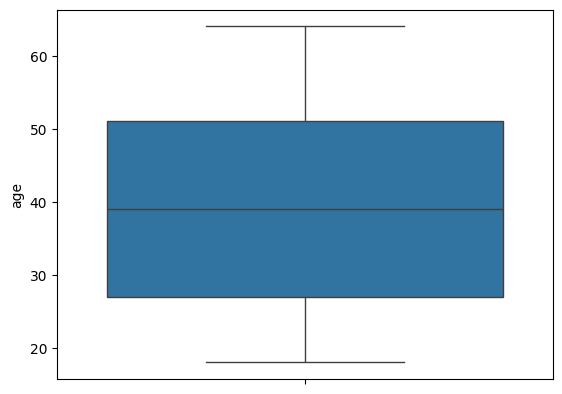

bmi


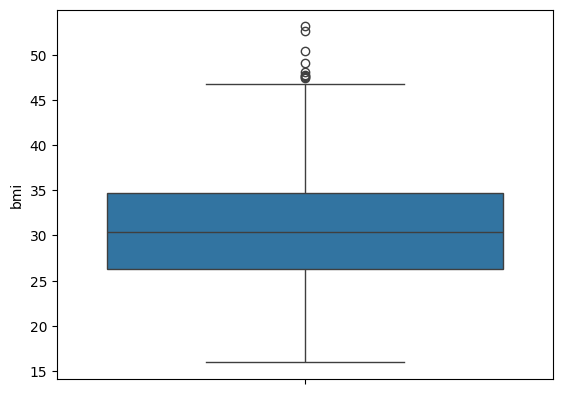

children


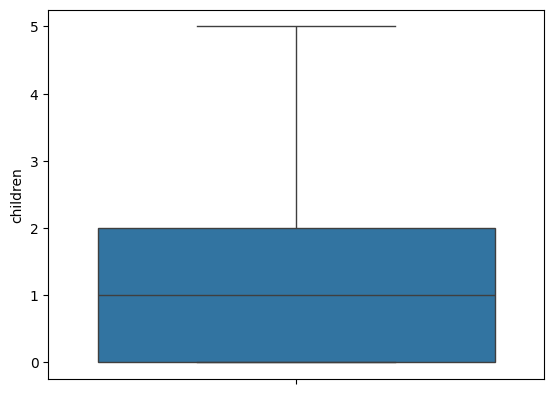

charges


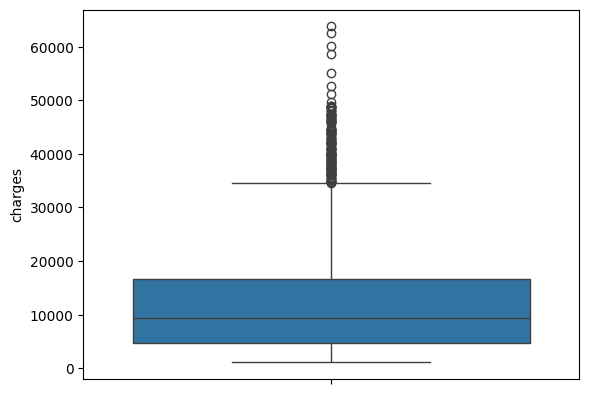

gender_code


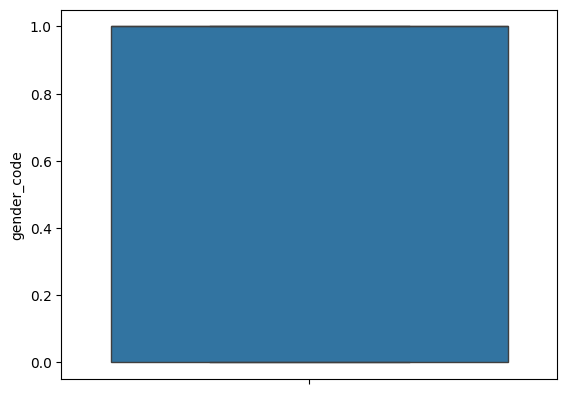

smoker_code


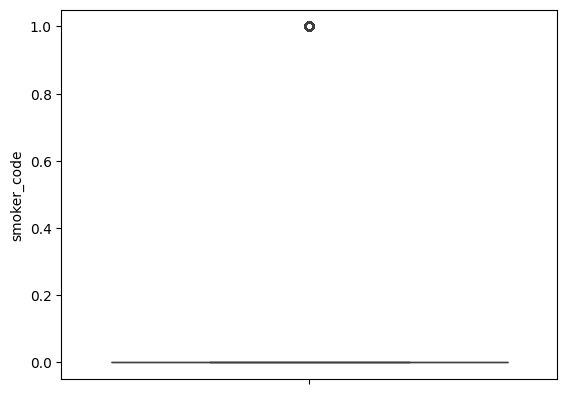

region_code


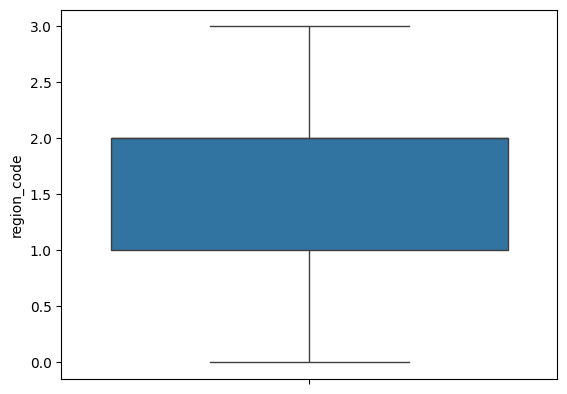

In [16]:
for i in num_col:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [17]:
# def iqr(df,x):
#     q1 = np.percentile(x,25)
#     q3 = np.percentile(x,75)
#     i = q3-q1
#     lf = q1 - 1.5*i
#     hf = q3 + 1.5*i
#     df = df[(x >= lf) & (x <= hf)]
#     return df
# df = iqr(df,df['charges'])
# df = iqr(df,df['bmi'])

<Axes: >

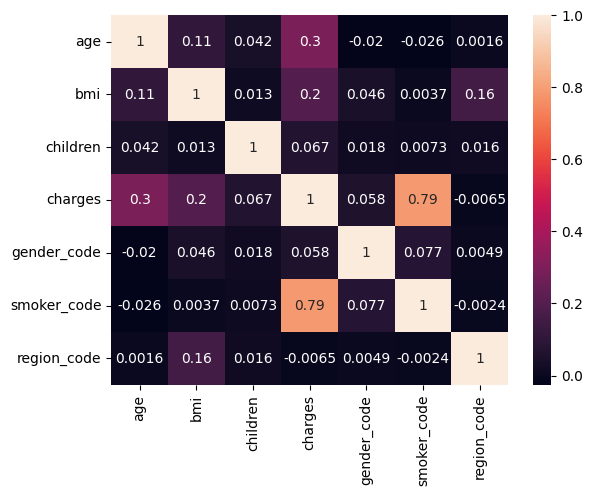

In [18]:
corr = df[num_col].corr()
sns.heatmap(corr,annot=True)

In [19]:
col = ['age','bmi', 'children','gender_code', 'smoker_code', 'region_code']

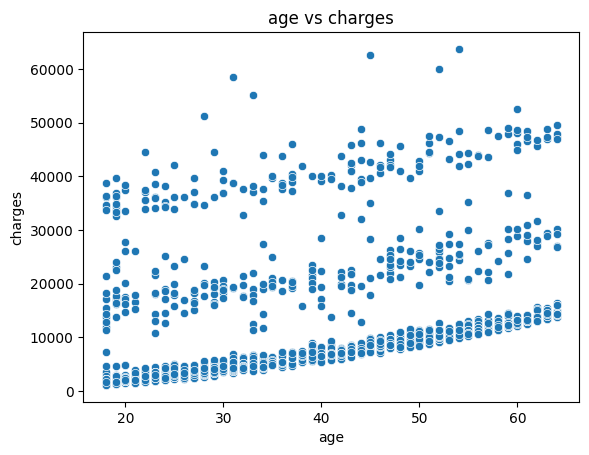

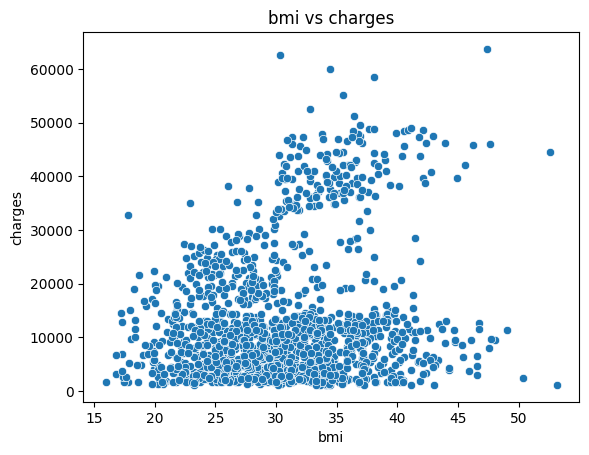

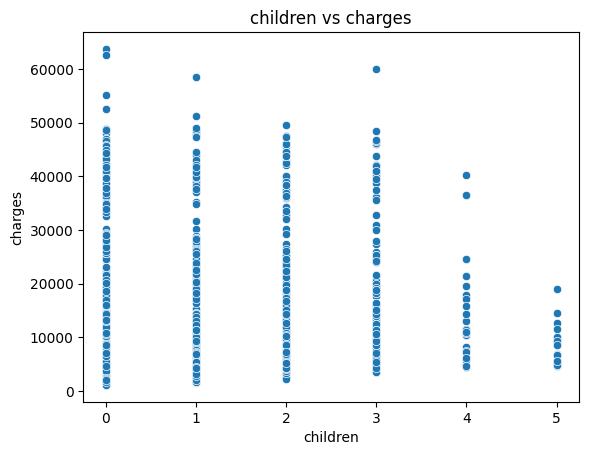

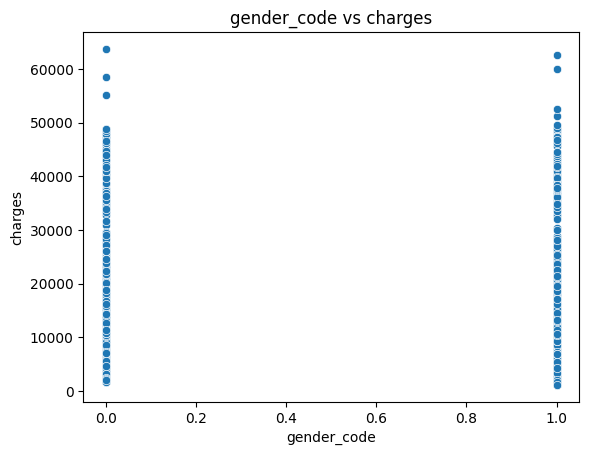

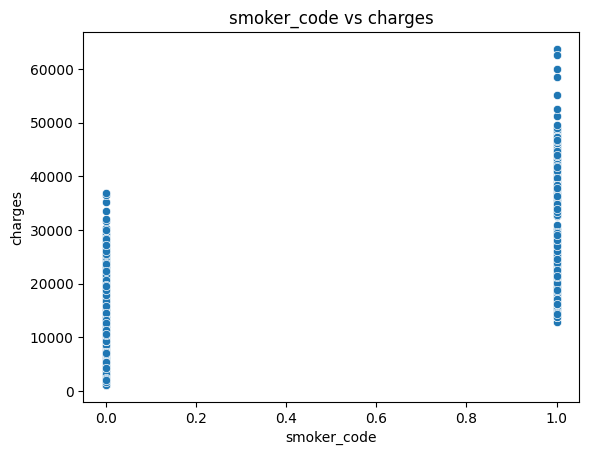

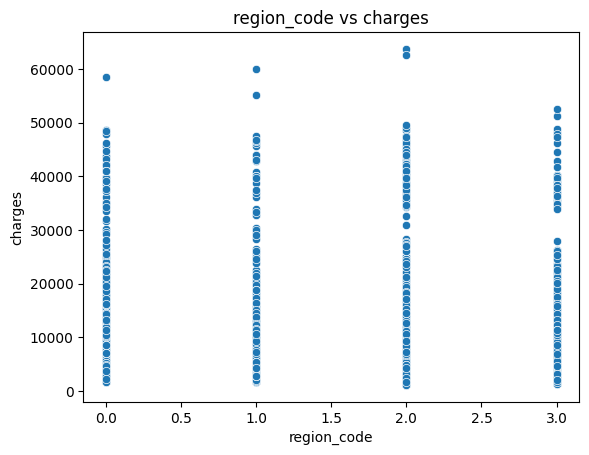

In [20]:
for i in col:
    sns.scatterplot(x=df[i],y=df['charges'])
    plt.title(f'{i} vs charges')
    plt.show()

In [21]:
X = np.array(df['age']).reshape(-1,1)
Y = np.array(df['charges']).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [22]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)
model = LinearRegression()
model.fit(x_poly_train,y_train)

LinearRegression()

In [23]:
z = model.predict(poly.fit_transform(x_test))


In [24]:
t = model.predict(x_poly_train)


In [25]:
r2_test = r2_score(y_test,z)
r2_test

0.021403268293072375

In [26]:
r2_train = r2_score(y_train,t)
r2_train

0.10684719505075602

In [27]:
mse_train = mean_squared_error(y_train,t)
mse_test = mean_squared_error(y_test,z)
print(mse_train)
print(mse_test)

128104889.04748826
154833748.31938383


In [28]:
# for i in range(1,50):
#     poly = PolynomialFeatures(degree=i)
#     x_poly_train = poly.fit_transform(x_train)
#     x_poly_test = poly.fit_transform(x_test)
#     model1 = LinearRegression()
#     model1.fit(x_poly_train,y_train)
#     r2_test = r2_score(y_test,model1.predict(x_poly_test))
#     r2_train = r2_score(y_train,model1.predict(x_poly_train))
#     if r2_test>0.5 and r2_train>0.5:
#         print(r2_train,r2_test,i)

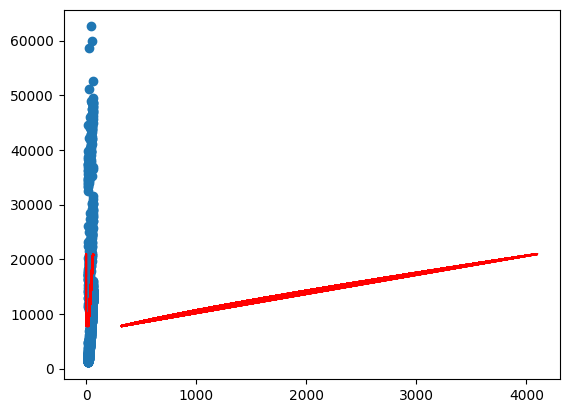

In [29]:
plt.scatter(x_train,y_train)
plt.plot(x_poly_train,t,color='r')

In [30]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_poly_train,y_train)
y_lasso_pred_train = lasso.predict(x_poly_train)
y_lasso_pred_test = lasso.predict(x_poly_test)
lasso_mse_train = mean_squared_error(y_train,y_lasso_pred_train)
lasso_mse_test = mean_squared_error(y_test,y_lasso_pred_test)
print(lasso_mse_train)
print(lasso_mse_test)

128104889.04979184
154833785.95432577


In [31]:
print(lasso.coef_)
print(model.coef_)


[ 0.         97.3448119   2.30595097]
[[ 0.         97.32211986  2.30623125]]


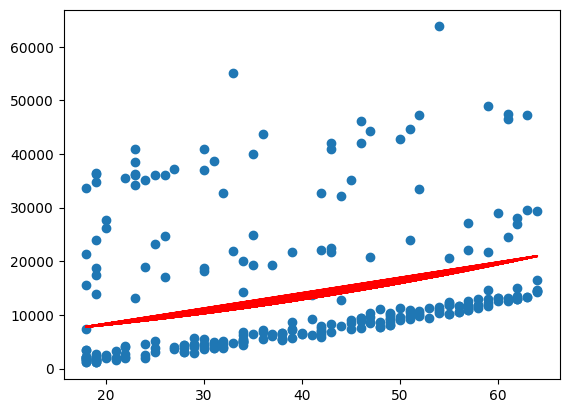

In [32]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_lasso_pred_test,color='r')

In [33]:
X = df[['age','bmi','smoker_code', 'children','gender_code', 'region_code']]
Y = np.array(df['charges']).reshape(-1,1)
x_test,x_train,y_test,y_train=train_test_split(X,Y,random_state=42,test_size=0.2)

In [34]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
z = model.predict(x_test)

In [36]:
r = model.predict(x_train)

In [37]:
r2_train = r2_score(y_train,r)
r2_train

0.8240257611383887

In [38]:
r2_test = r2_score(y_test,z)
r2_test

0.7105358453922561